In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates

In [78]:
results_df = pd.read_csv('results/rolling.csv', index_col='measurement_start_utc')
results_df.index = pd.to_datetime(results_df.index)
print(results_df.index)

DatetimeIndex(['2019-11-04 00:00:00', '2019-11-04 01:00:00',
               '2019-11-04 02:00:00', '2019-11-04 03:00:00',
               '2019-11-04 04:00:00', '2019-11-04 05:00:00',
               '2019-11-04 06:00:00', '2019-11-04 07:00:00',
               '2019-11-04 08:00:00', '2019-11-04 09:00:00',
               ...
               '2019-11-08 14:00:00', '2019-11-08 15:00:00',
               '2019-11-08 16:00:00', '2019-11-08 17:00:00',
               '2019-11-08 18:00:00', '2019-11-08 19:00:00',
               '2019-11-08 20:00:00', '2019-11-08 21:00:00',
               '2019-11-08 22:00:00', '2019-11-08 23:00:00'],
              dtype='datetime64[ns]', name='measurement_start_utc', length=120, freq=None)


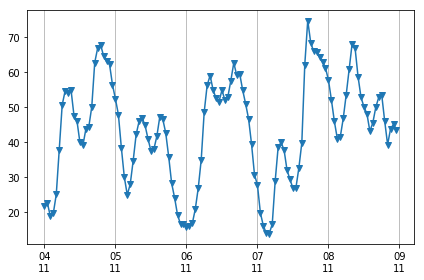

In [96]:
fig, ax = plt.subplots()
ax.plot_date(results_df.index, results_df.mae, 'v-')
# ax.plot_date(results_df.index, results_df.mse, 'v-')
# ax.plot_date(results_df.index, results_df.r2, 'v-')
# ax.xaxis.set_major_locator(dates.DayLocator())
#                            dates.WeekdayLocator(byweekday=(1),
#                                                 interval=1))
# ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))
ax.xaxis.grid(True, which="major")

ax.xaxis.set_major_locator(dates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d\n%m'))
plt.tight_layout()
plt.show()
# results_df.r2.plot()


In [97]:
preds = pd.read_csv('results/preds.csv')
preds['measurement_start_utc'] = pd.to_datetime(preds['measurement_start_utc'])
gb = preds.groupby('point_id')
print(preds.columns)

Index(['Unnamed: 0', 'measurement_start_utc', 'point_id', 'source', 'location',
       'lat', 'lon', 'fit_start_time', 'predict_mean', 'predict_var', 'NO2'],
      dtype='object')


In [103]:
def plot_pretty_timeseries(time, series, ax):
    ax.plot_date(time, series, ',', linestyle='-')
    ax.xaxis.grid(True, which="major")
    ax.xaxis.set_major_locator(dates.DayLocator(interval=1))
    ax.xaxis.set_major_formatter(dates.DateFormatter('%d\n%m'))
    return ax

In [113]:
n = 5
c = 2
fig, axs = plt.subplots(n, c, sharex=True, sharey=True)
i = 0
j = 0
for point, row in gb:
    plot_pretty_timeseries(row['measurement_start_utc'], row['predict_mean'], axs[i, j])
#     plot_pretty_timeseries(row['measurement_start_utc'], row['NO2'], axs[i, j])
    i += j % 2
    j += 1
    j = j % 2
    if i == n:
        break

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11e2258c8> (for post_execute):


RuntimeError: Locator attempting to generate 7977 ticks from 729758.0 to 737734.0: exceeds Locator.MAXTICKS

RuntimeError: Locator attempting to generate 7977 ticks from 729758.0 to 737734.0: exceeds Locator.MAXTICKS